In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import cv2
import random

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from IPython import display

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:
PATH = "images"

IMG_SIZE = 128
BATCH_SIZE = 32

In [3]:
labels = os.listdir(PATH)


In [4]:
def getimages(path):
    data = []
    for label in labels:
        imagelocation = os.path.join(path, label)
        class_num = labels.index(label)
        print(label)
        for img in os.listdir(imagelocation):
            image = PIL.Image.open(imagelocation + '/' + img)
            resized_img = image.resize((IMG_SIZE,IMG_SIZE))
            resized_img = np.array(resized_img)

            if(resized_img.shape[2] == 3):
                data.append([resized_img, class_num])
        
    return data

In [5]:
images = getimages(PATH)

blackcar
greencar
hot-air-balloons


C:\Users\Danny\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


plane
redcar
steam-train


C:\Users\Danny\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


yellowcar


In [6]:
random.shuffle(images)

In [7]:
len(images)

1861

In [8]:
train = images[0:1500]
val = images[1500:]

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

In [10]:
train_datagen = ImageDataGenerator(rotation_range = 45,
                                  width_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  rescale=1/255.)

train_datagen.fit(x_train)



In [11]:
train_generator = train_datagen.flow(x_train, y_train, BATCH_SIZE)

In [12]:
train_generator[0][0].shape

(32, 128, 128, 3)

In [13]:
1500/47

31.914893617021278

In [14]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [245]:
activation = 'sigmoid'

model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)       

In [246]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 47,
        epochs = 10,
        validation_data = (x_val, y_val)
)

Epoch 1/10
47/47 [==============================] - 93s 2s/step - loss: 1.5197 - accuracy: 0.4420 - val_loss: 1.9045 - val_accuracy: 0.1690
Epoch 2/10
47/47 [==============================] - 95s 2s/step - loss: 1.2007 - accuracy: 0.5647 - val_loss: 1.9654 - val_accuracy: 0.2604
Epoch 3/10
47/47 [==============================] - 94s 2s/step - loss: 1.1032 - accuracy: 0.5980 - val_loss: 1.4517 - val_accuracy: 0.4432
Epoch 4/10
47/47 [==============================] - 94s 2s/step - loss: 1.0275 - accuracy: 0.6367 - val_loss: 1.2920 - val_accuracy: 0.5263
Epoch 5/10
47/47 [==============================] - 96s 2s/step - loss: 0.9878 - accuracy: 0.6547 - val_loss: 1.2106 - val_accuracy: 0.5596
Epoch 6/10
47/47 [==============================] - 97s 2s/step - loss: 0.9609 - accuracy: 0.6673 - val_loss: 1.4964 - val_accuracy: 0.4238
Epoch 7/10
47/47 [==============================] - 96s 2s/step - loss: 0.9340 - accuracy: 0.6647 - val_loss: 1.7666 - val_accuracy: 0.3795
Epoch 8/10
47/47 [==

In [247]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_4 (None, 128, 128, 32)
2 conv2d_5 (None, 128, 128, 32)
5 conv2d_6 (None, 64, 64, 64)
7 conv2d_7 (None, 64, 64, 64)
10 conv2d_8 (None, 32, 32, 64)
13 conv2d_9 (None, 16, 16, 64)


In [248]:
firstlayer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
secondlayer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
thirdlayer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[5].output)
fourthlayer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[7].output)
fifthlayer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[10].output)
sixthlayer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[13].output)

In [294]:
img = PIL.Image.open(PATH + '/hot-air-balloons/' + os.listdir(PATH + '/hot-air-balloons/')[7])

In [295]:
resized_img = img.resize((IMG_SIZE,IMG_SIZE))

In [296]:
resized_img

resized_img = np.expand_dims(resized_img, axis=0)

In [297]:
array = np.array(resized_img)

In [298]:
firstfeature_maps = firstlayer.predict(array)
secondfeature_maps = secondlayer.predict(array)
thirdfeature_maps = thirdlayer.predict(array)
fourthfeature_maps = fourthlayer.predict(array)
fifthfeature_maps = fifthlayer.predict(array)
sixthfeature_maps = sixthlayer.predict(array)

In [299]:
array.shape

(1, 128, 128, 3)

In [300]:
np.argmax(model.predict(array))

2

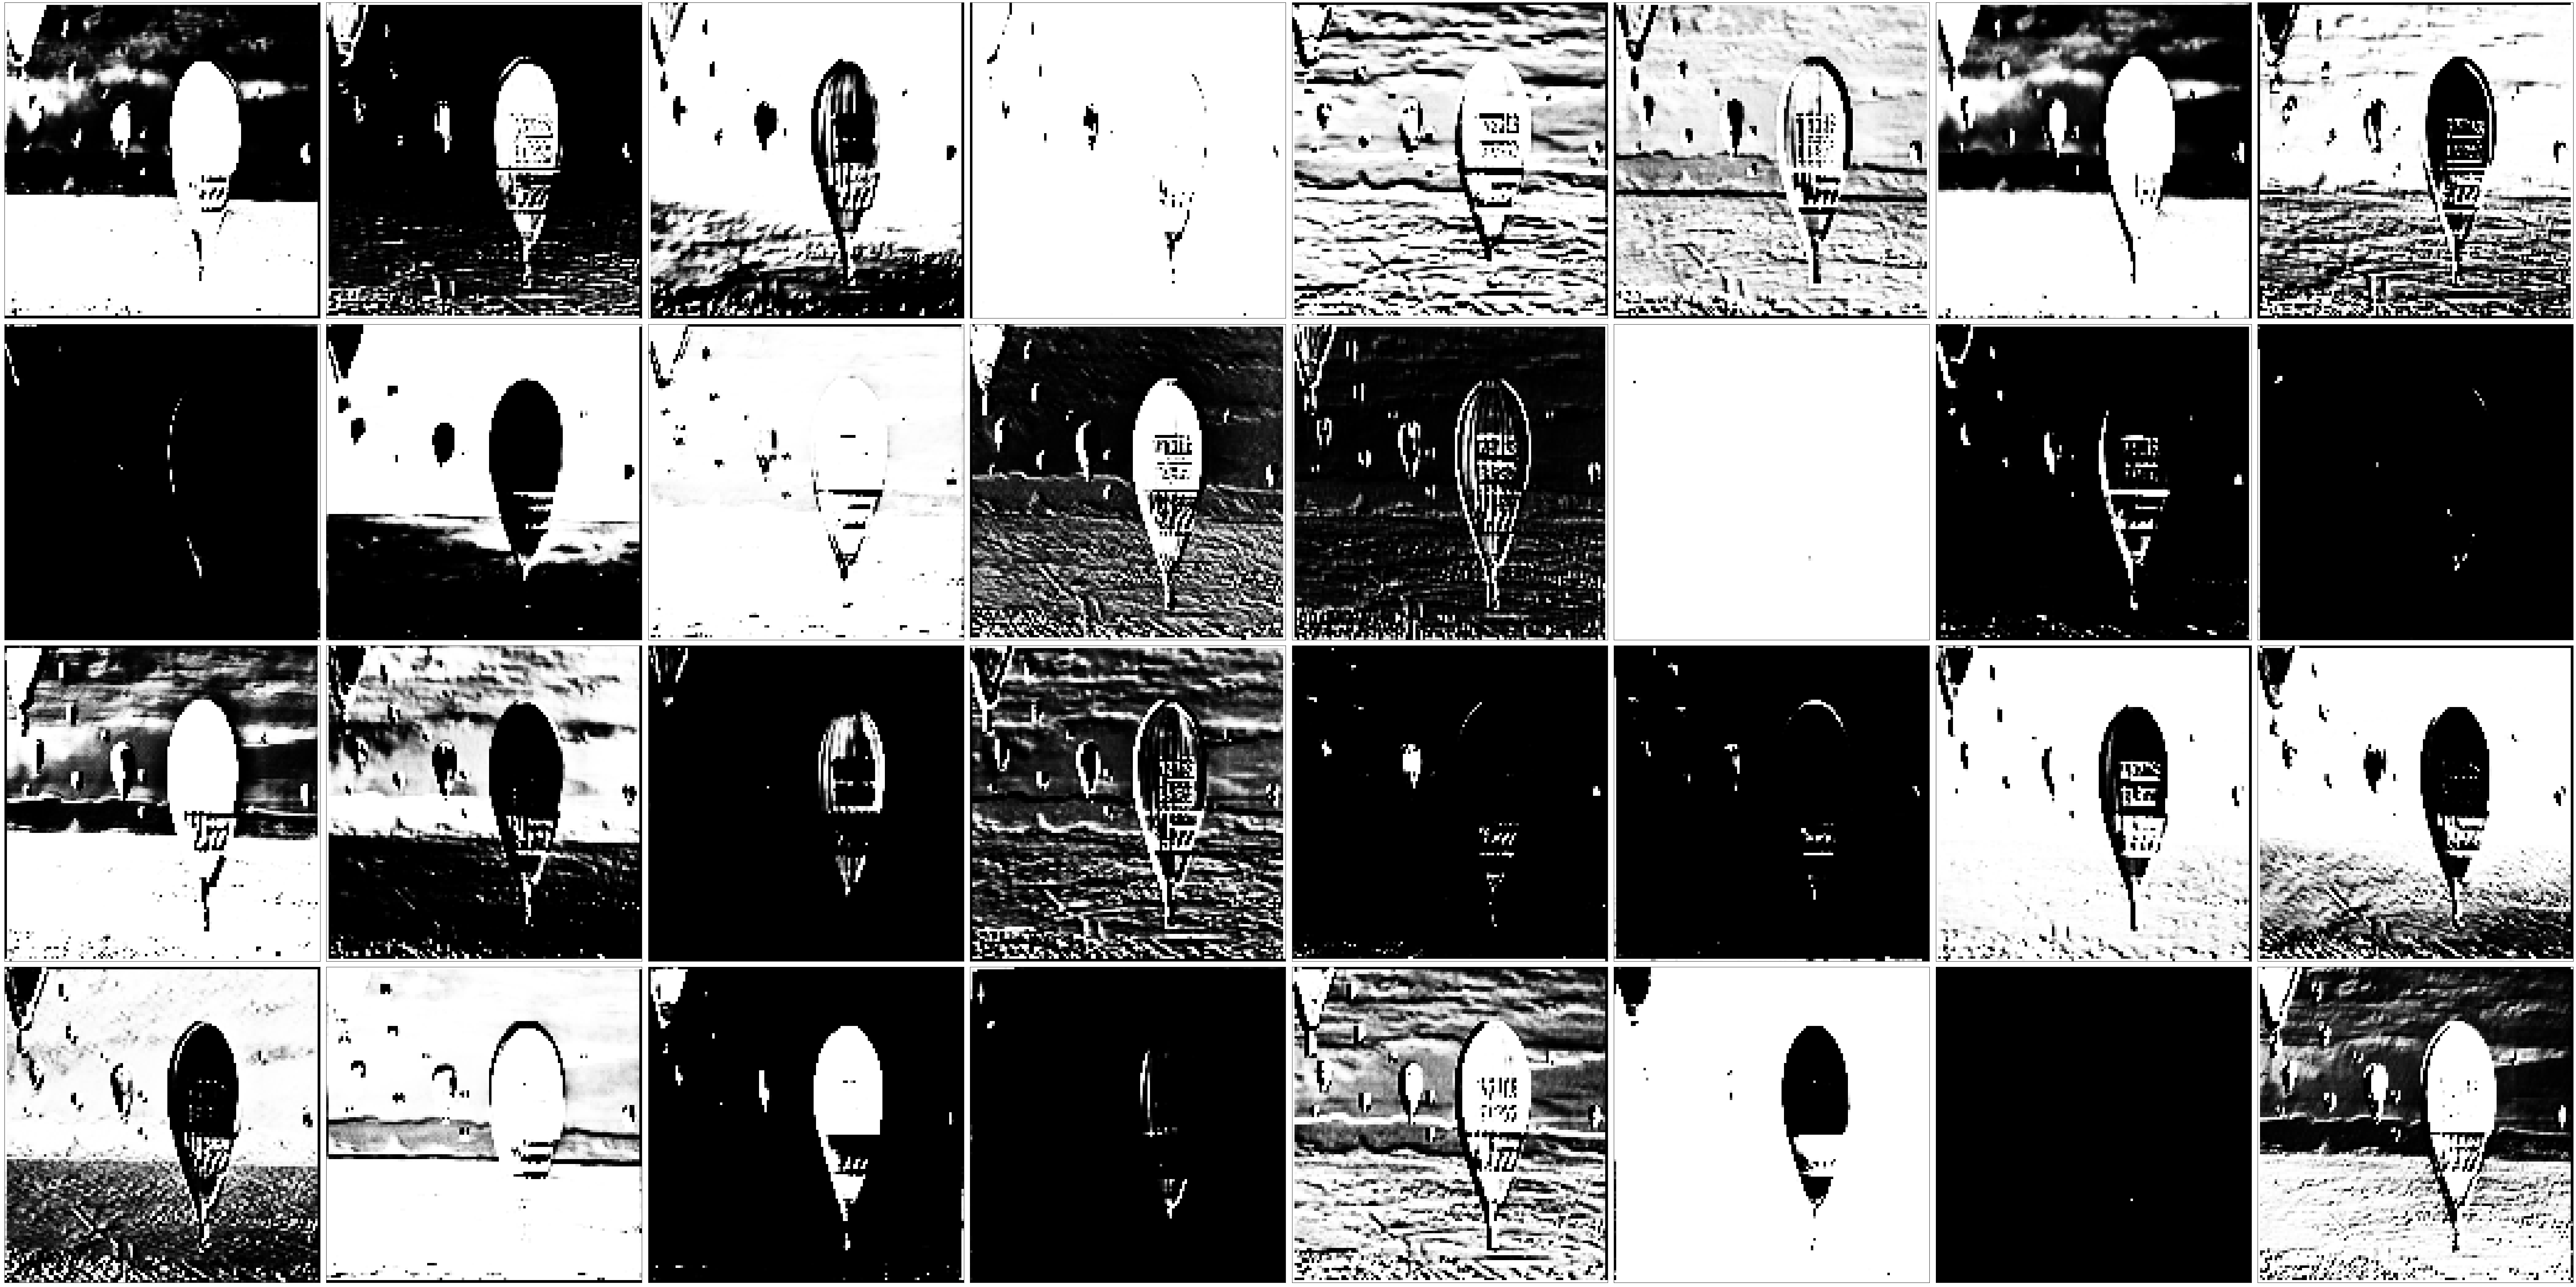

In [301]:
f, ax = plt.subplots(4, 8, figsize = (88, 44), tight_layout = True)
ix = 0
for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])
        b.imshow(firstfeature_maps[0, :, : , ix], cmap = 'gray')
        ix = ix + 1

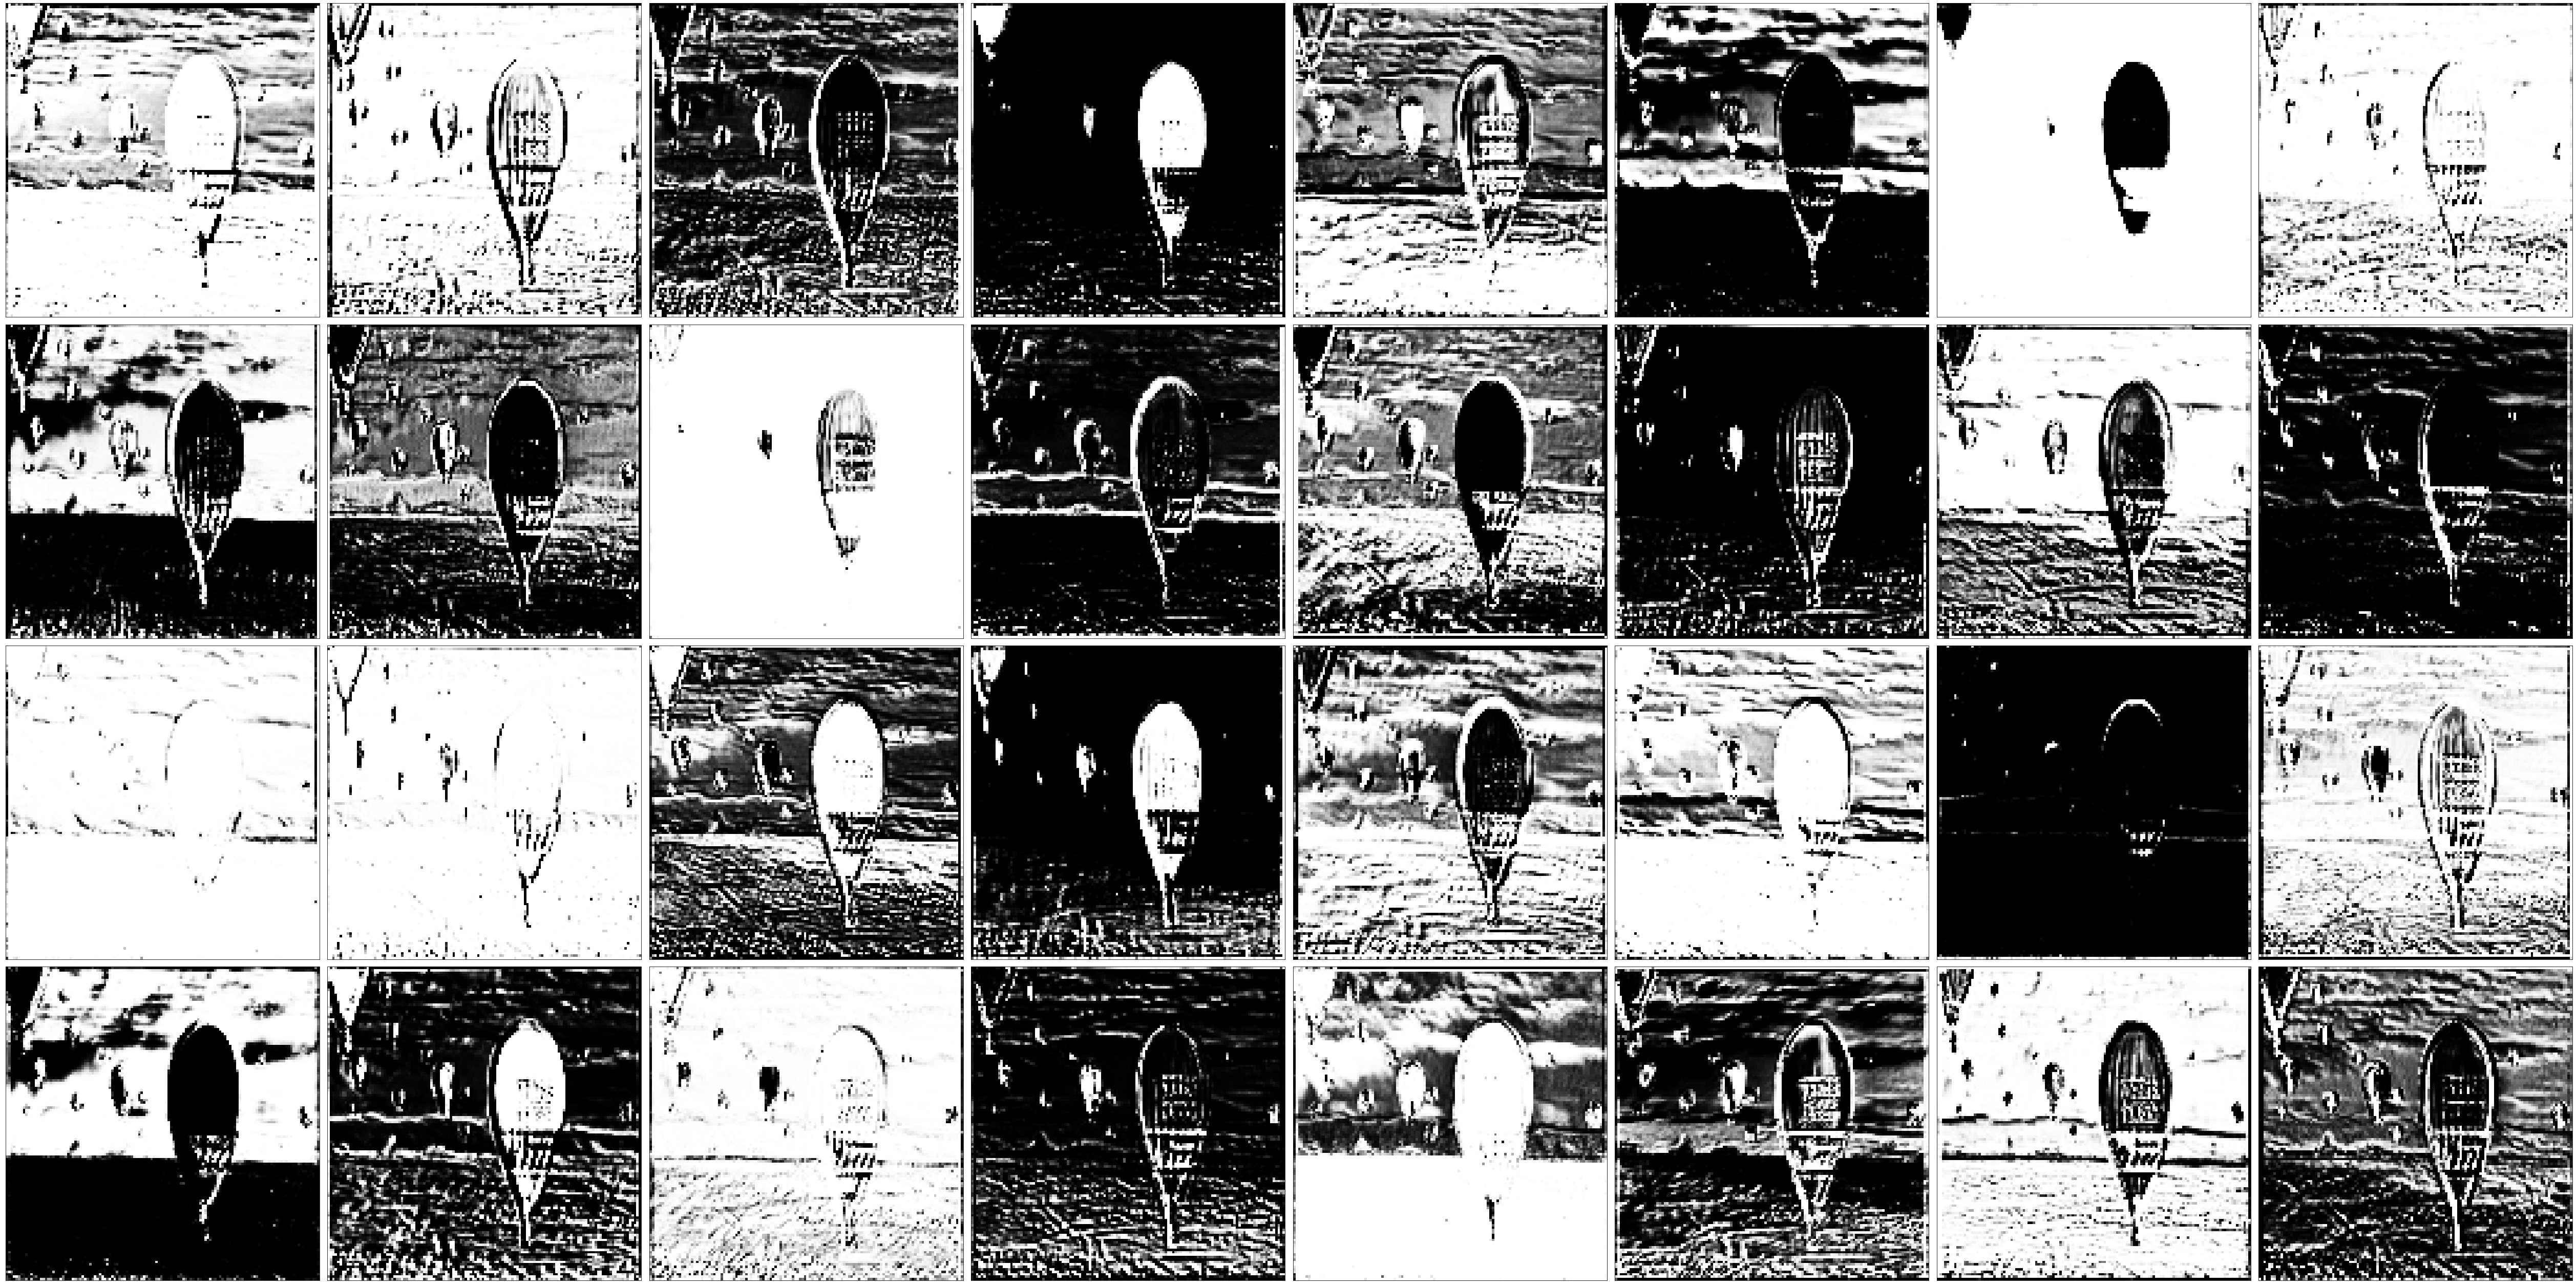

In [302]:
f, ax = plt.subplots(4, 8, figsize = (70, 35), tight_layout = True)
ix = 0
for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])
        b.imshow(secondfeature_maps[0, :, : , ix], cmap = 'gray')
        ix = ix + 1


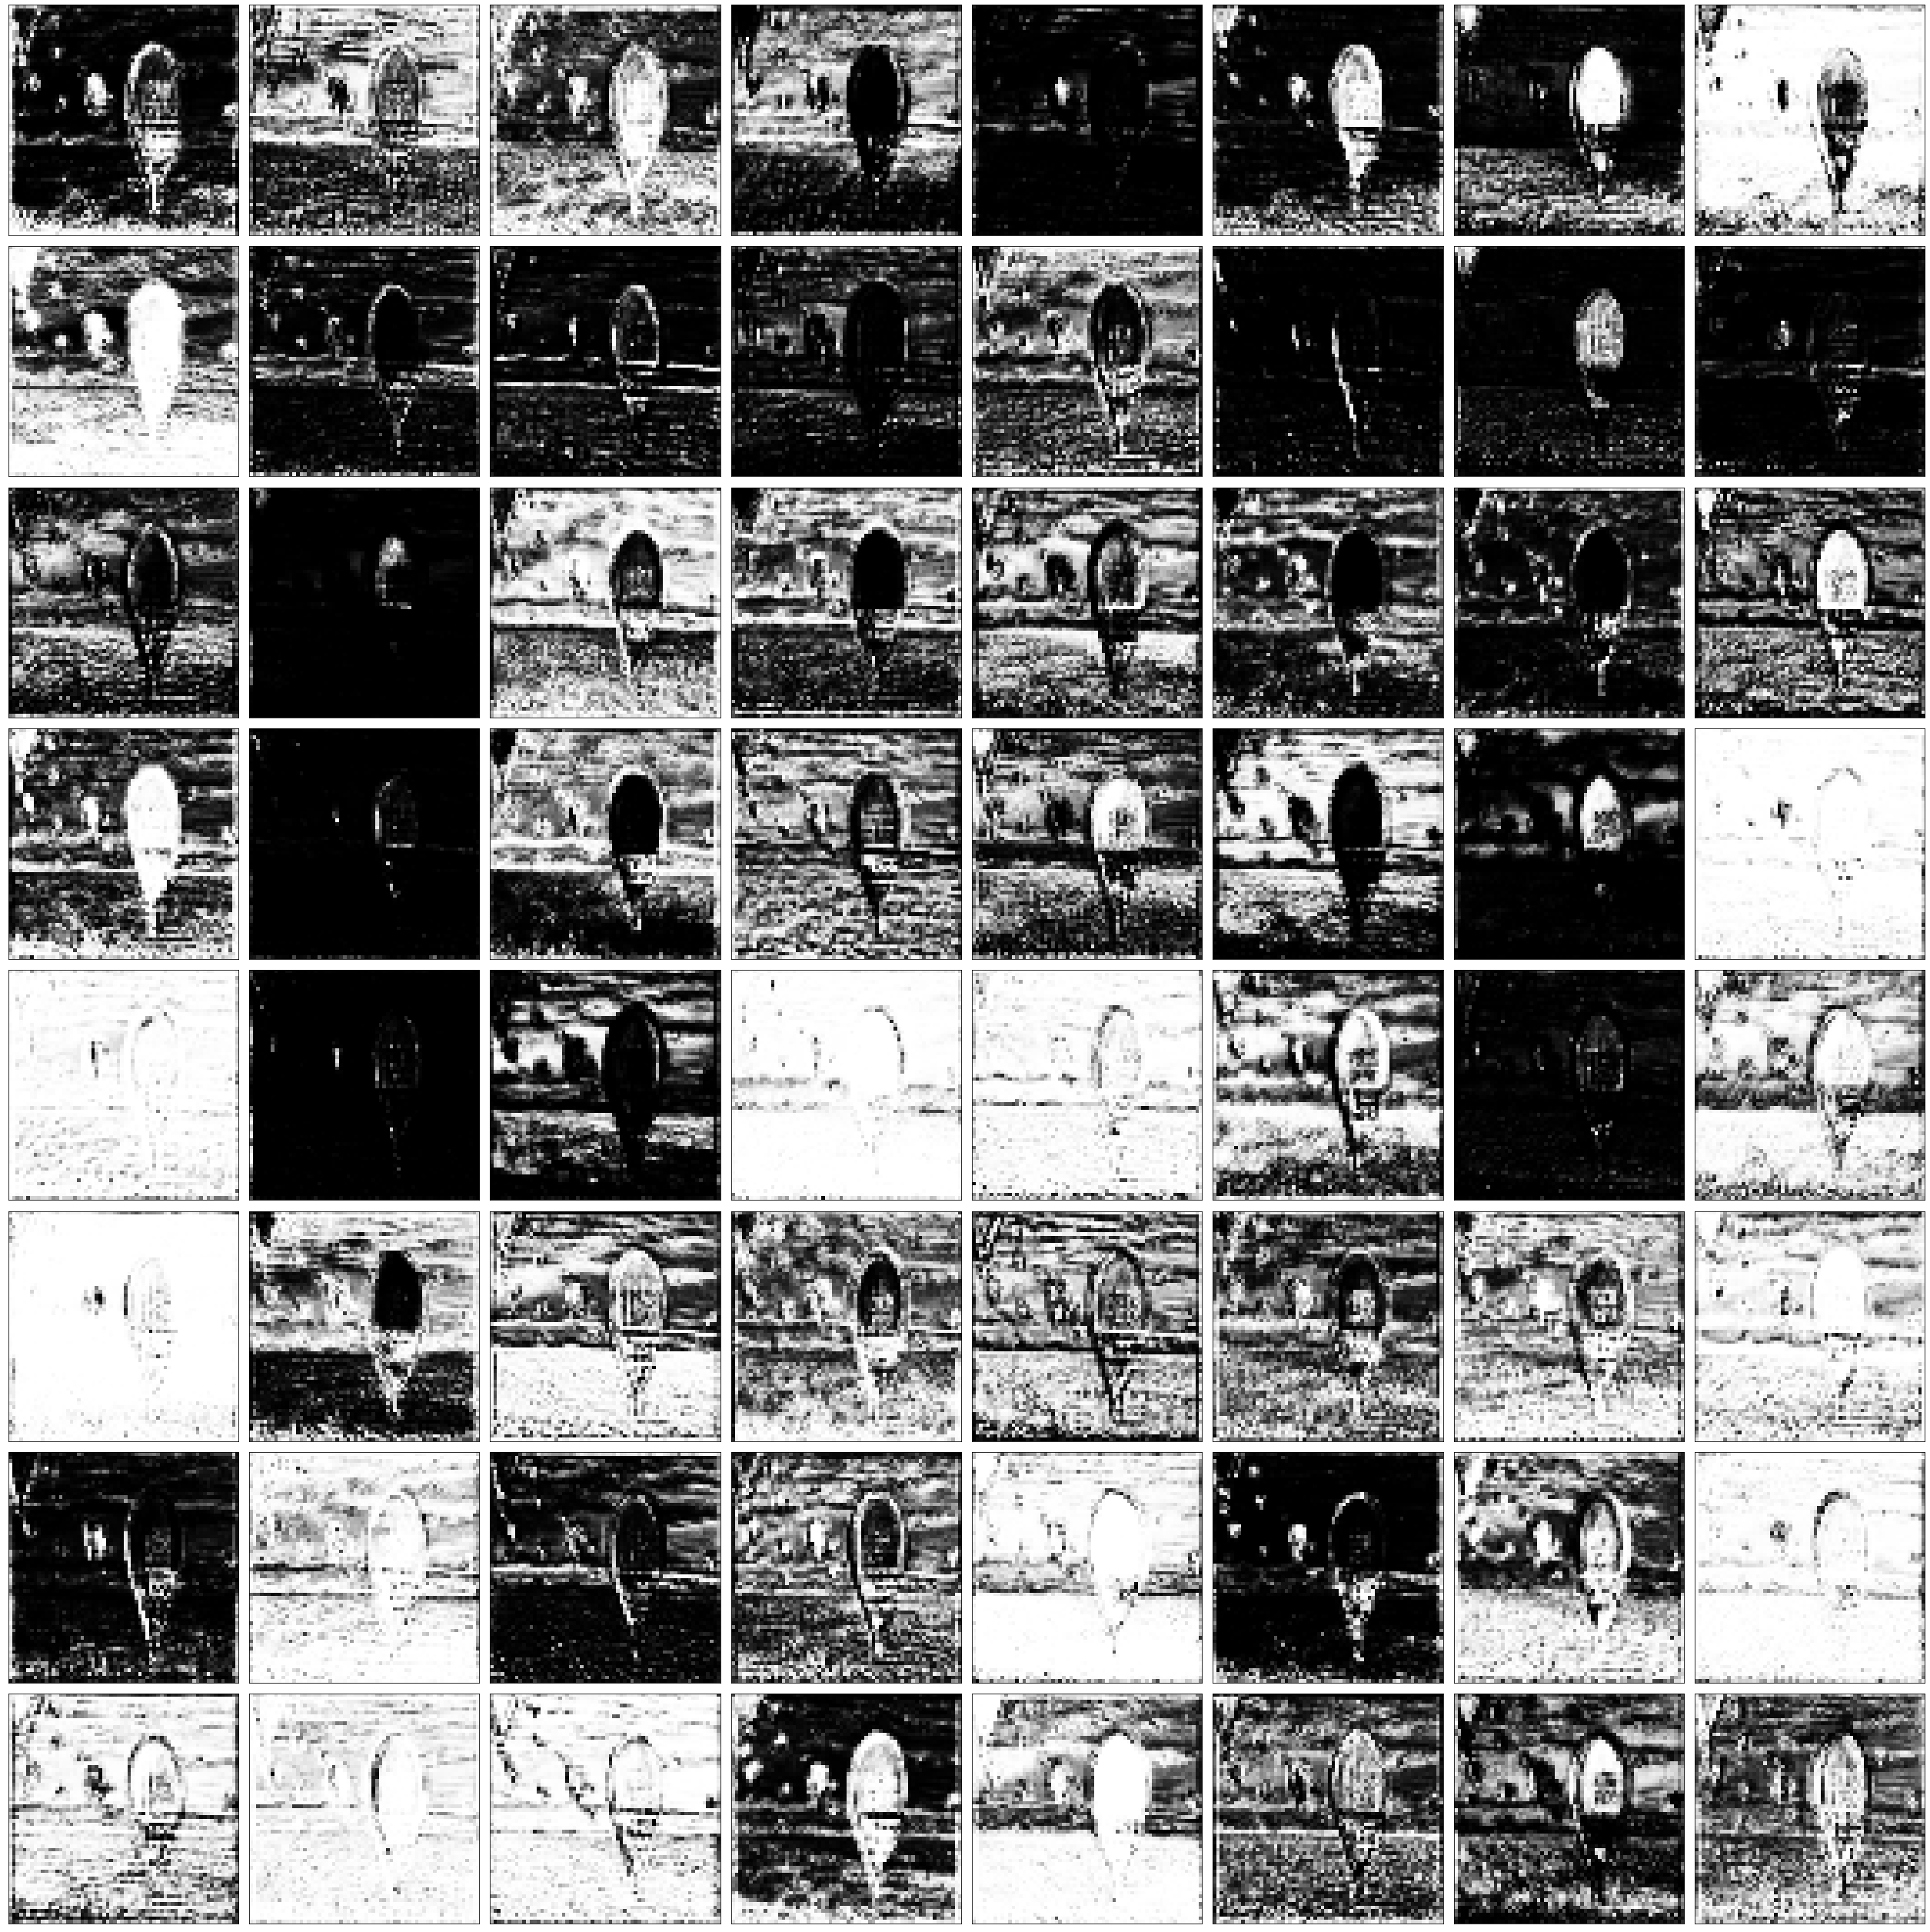

In [303]:
f, ax = plt.subplots(8, 8, figsize = (35, 35), tight_layout = True)
ix = 0
for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])
        b.imshow(thirdfeature_maps[0, :, : , ix], cmap = 'gray')
        ix = ix + 1


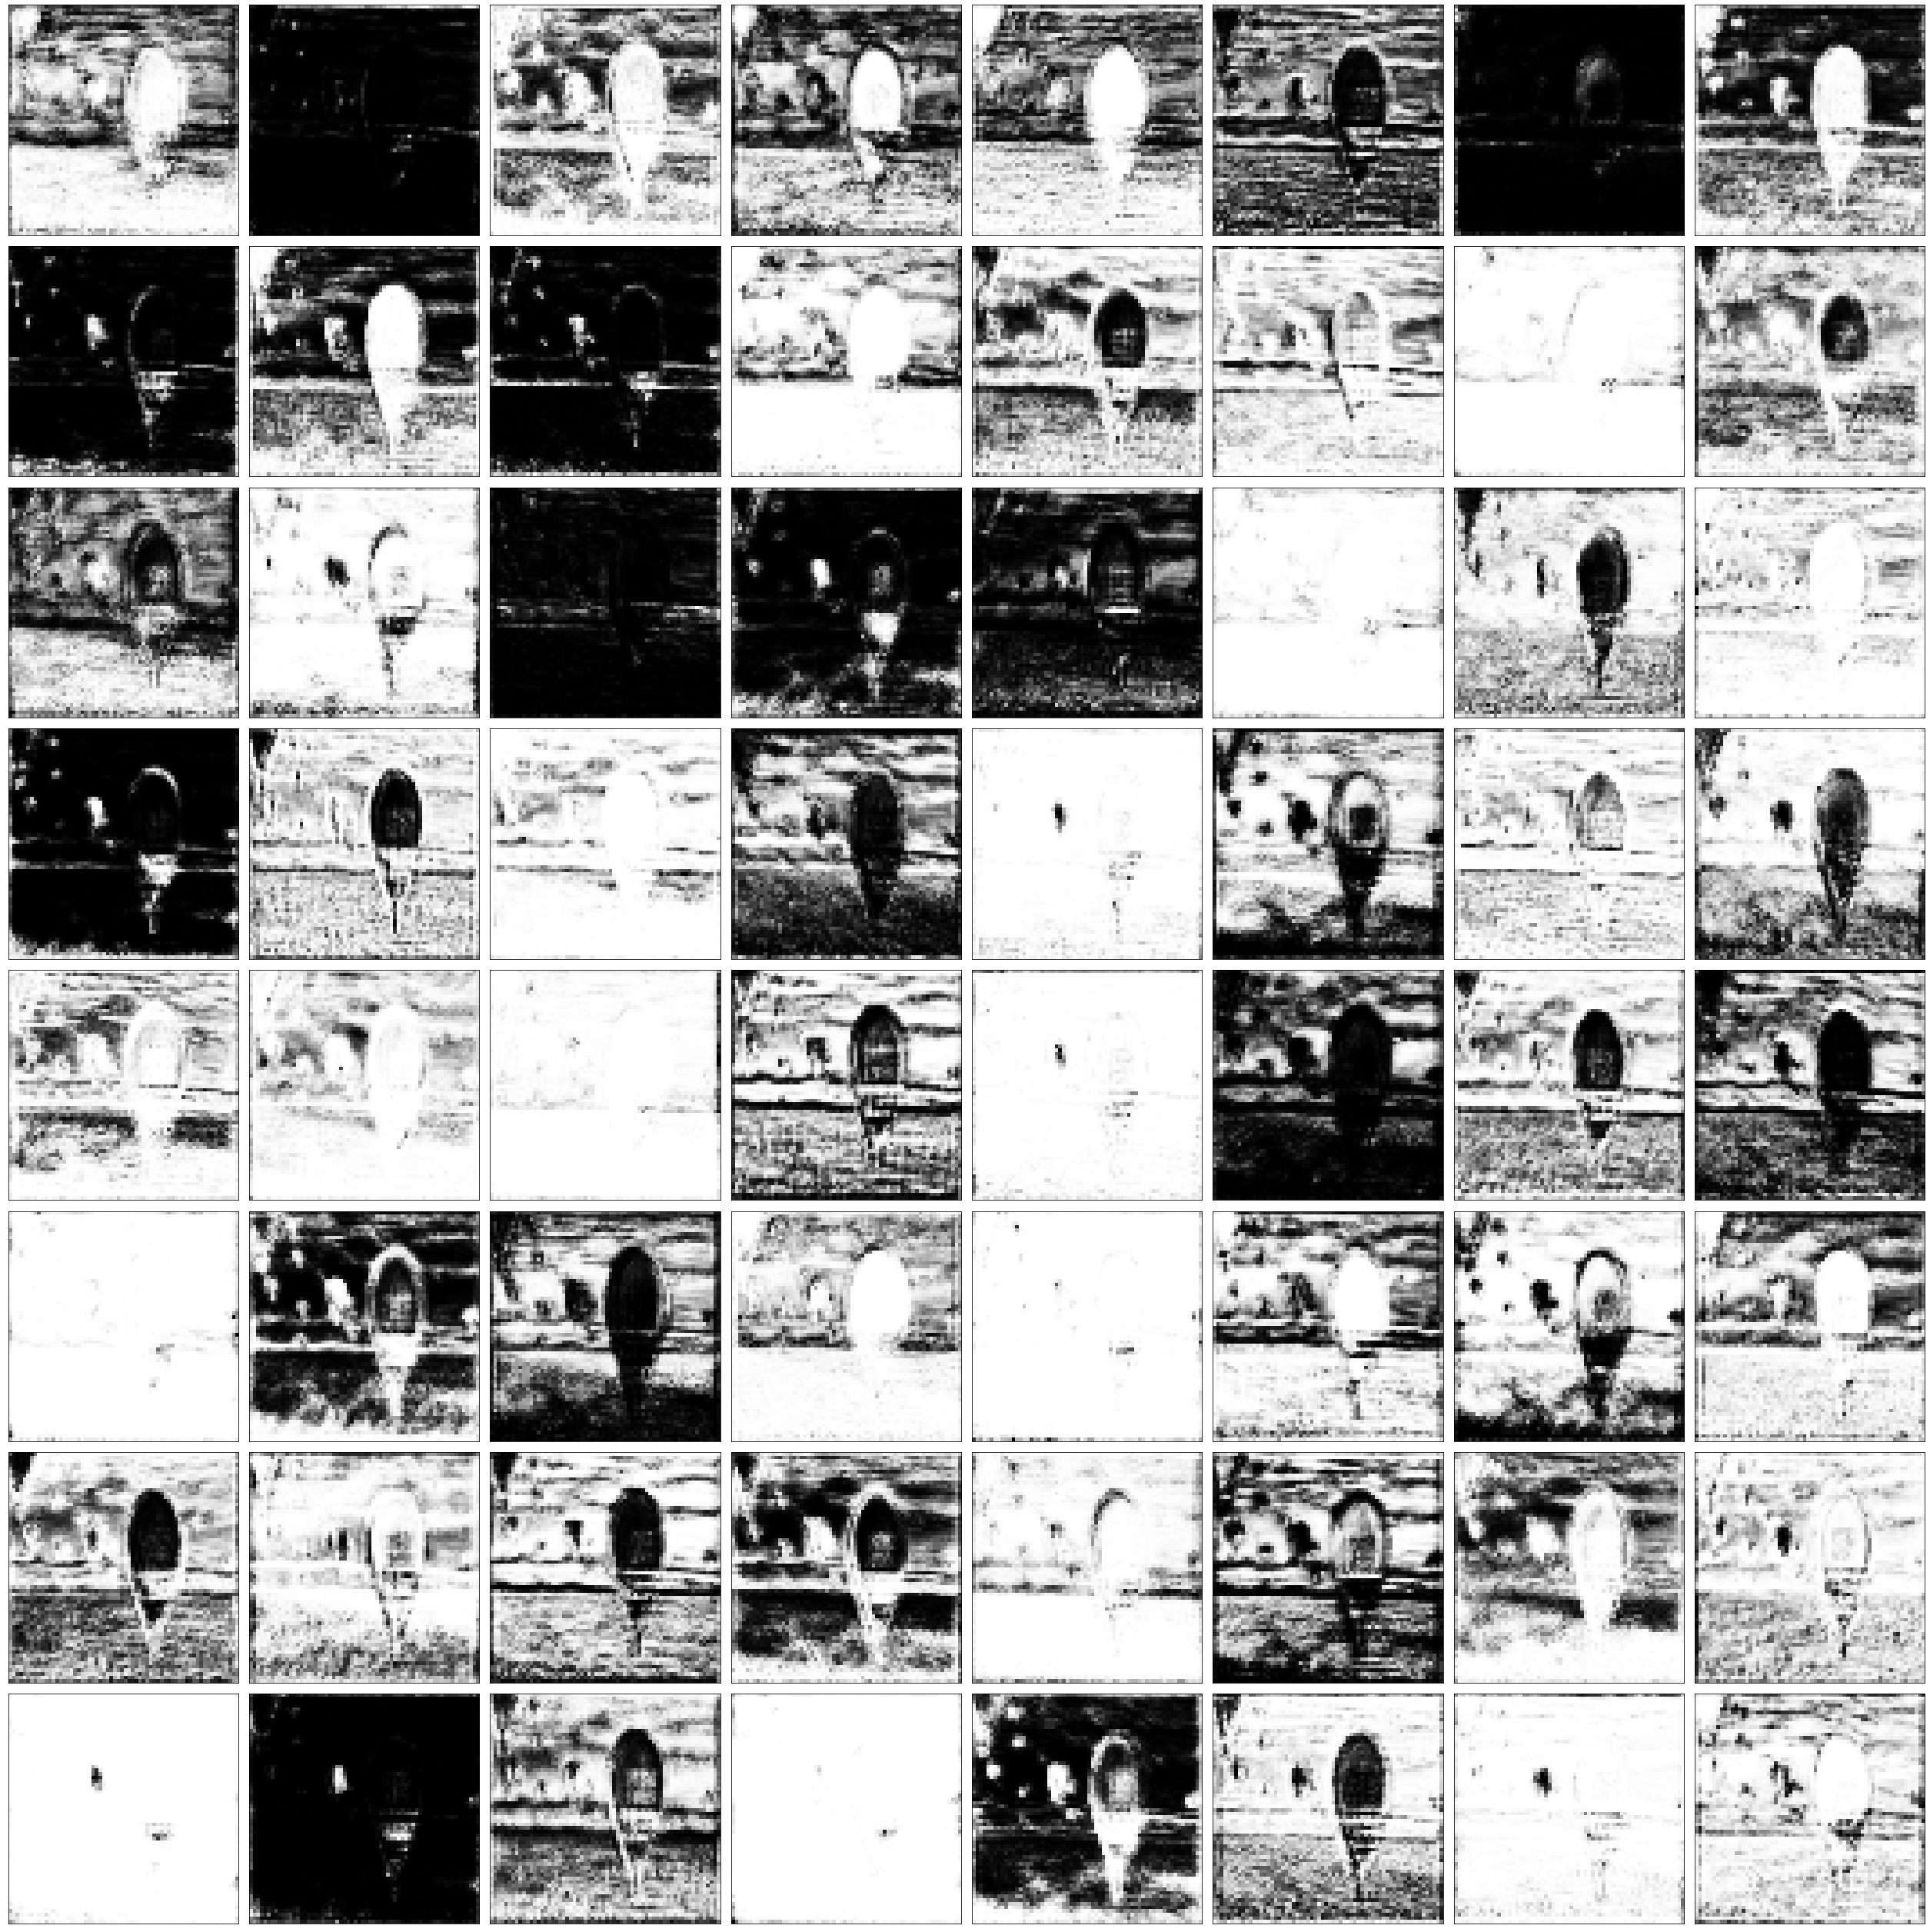

In [304]:
f, ax = plt.subplots(8, 8, figsize = (35, 35), tight_layout = True)
ix = 0
for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])
        b.imshow(fourthfeature_maps[0, :, : , ix], cmap = 'gray')
        ix = ix + 1




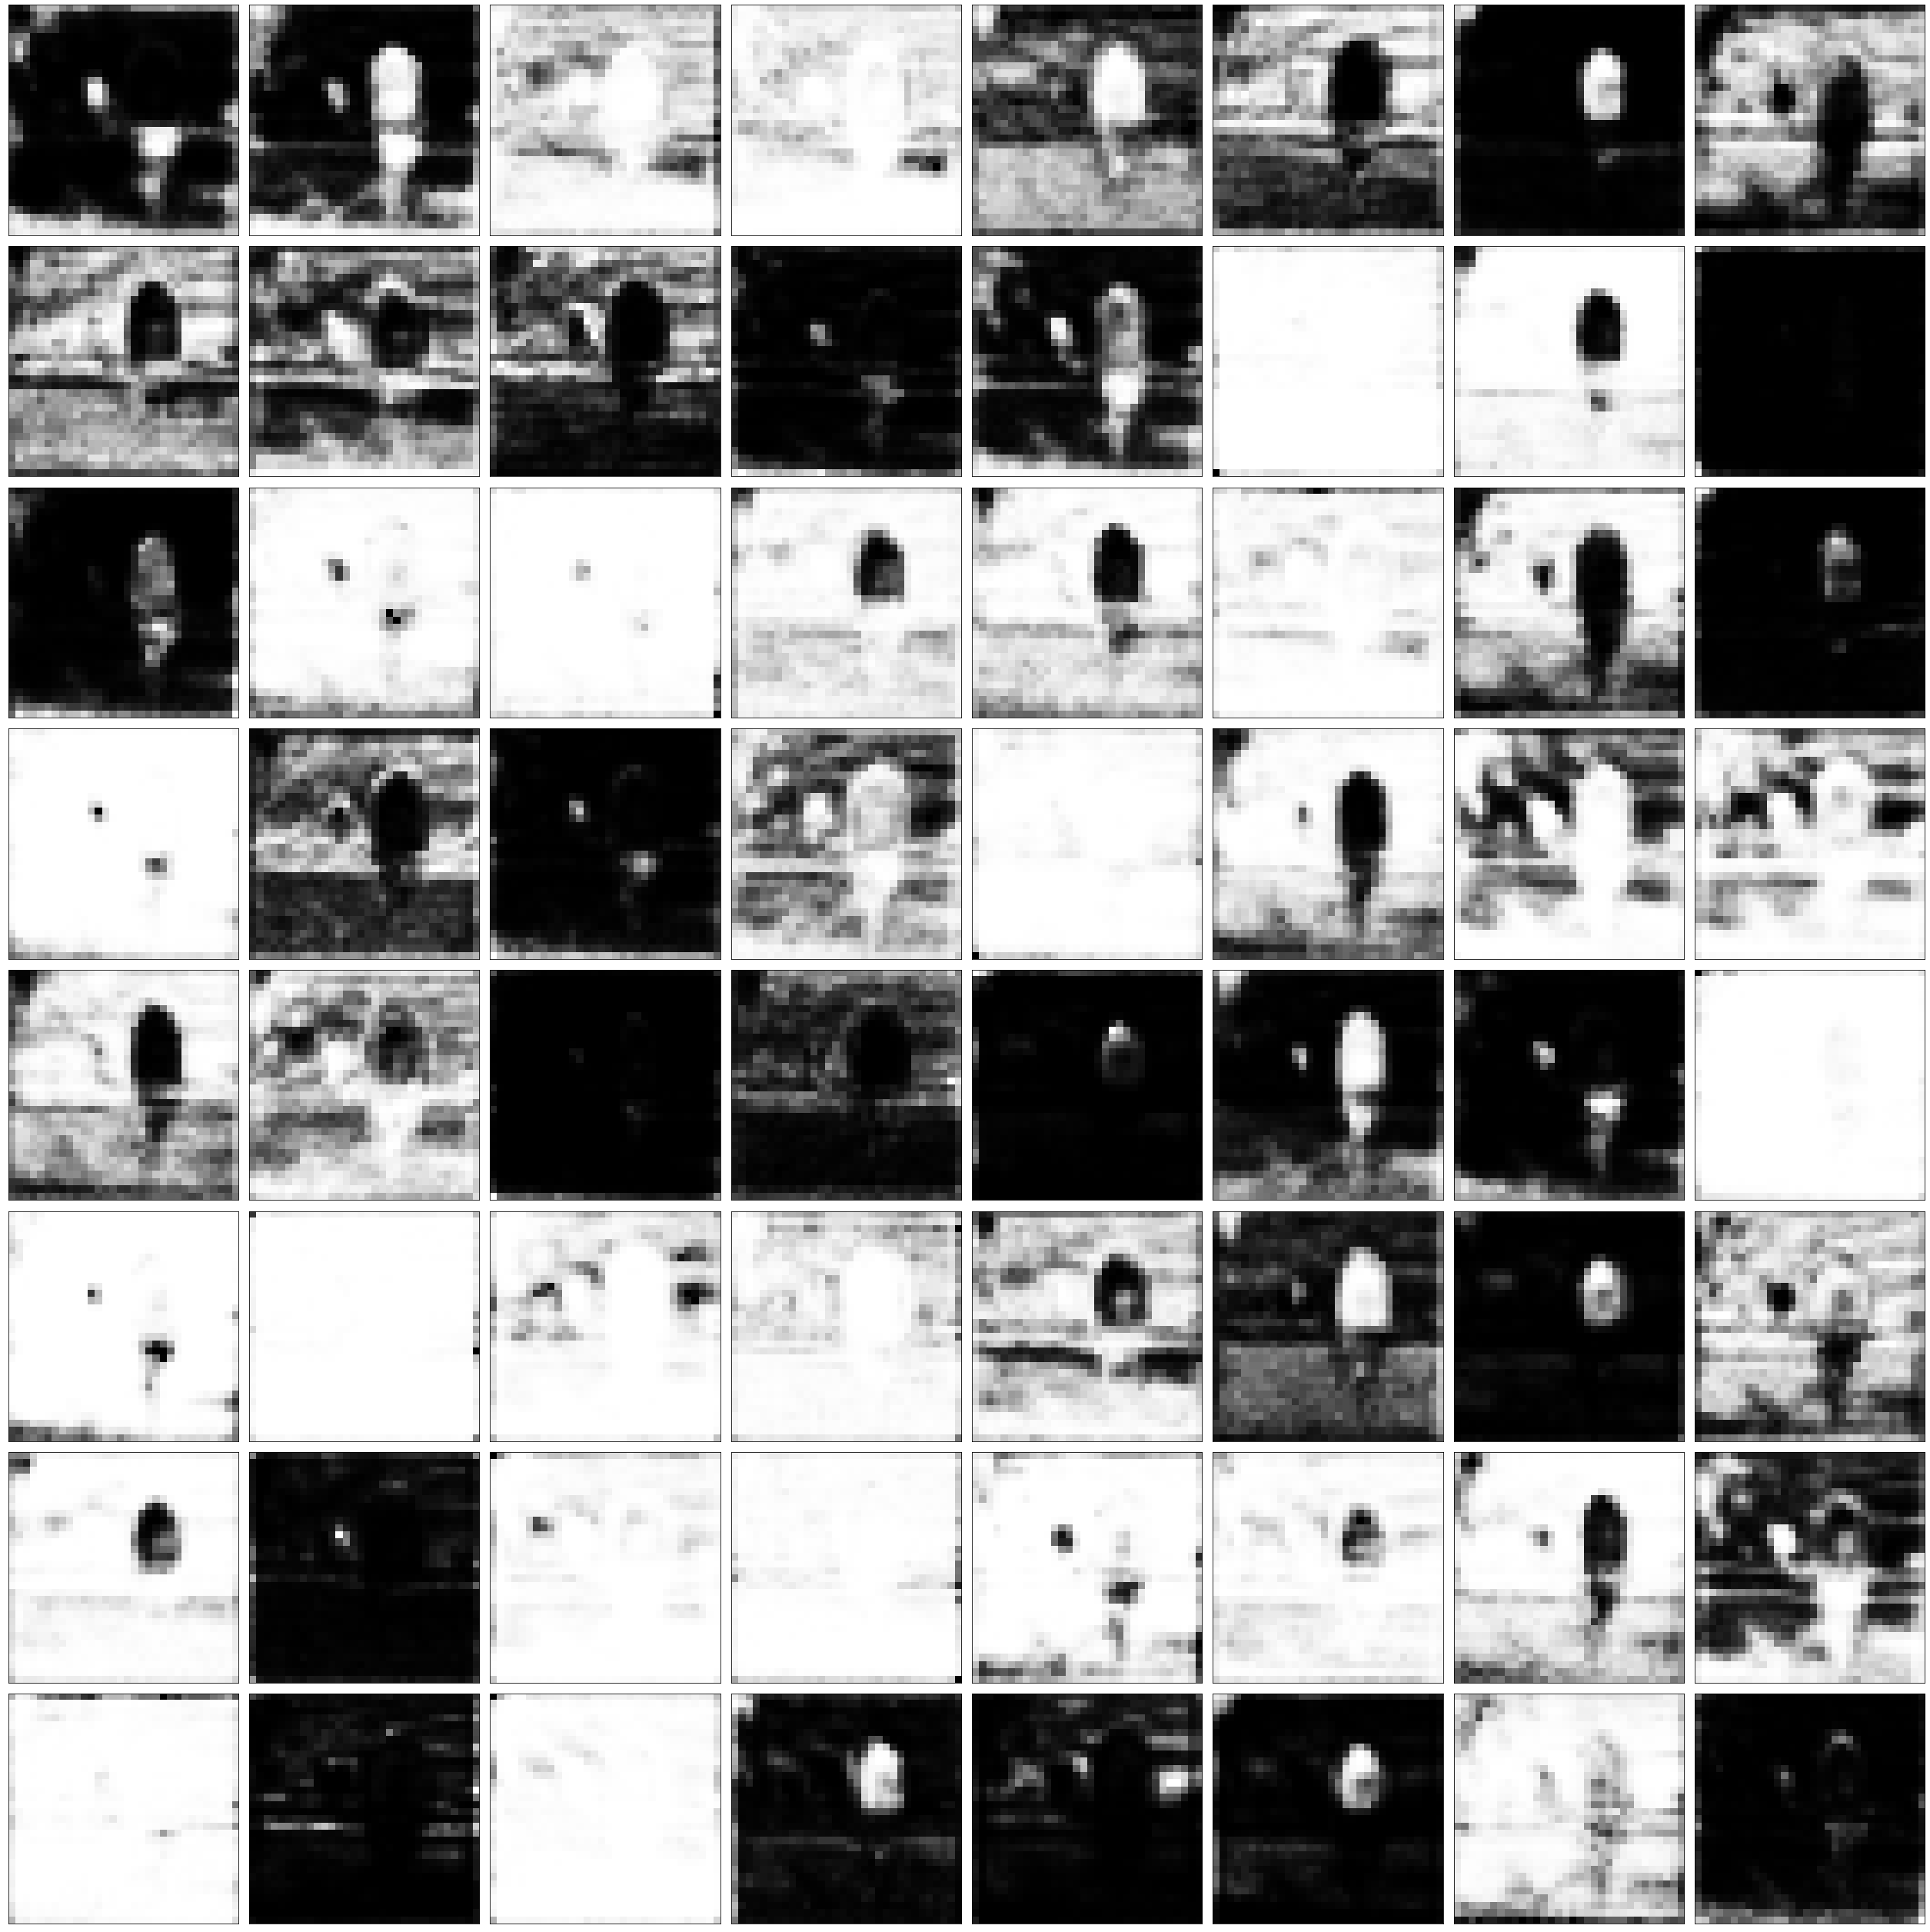

In [305]:
f, ax = plt.subplots(8, 8, figsize = (35, 35), tight_layout = True)
ix = 0
for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])
        b.imshow(fifthfeature_maps[0, :, : , ix], cmap = 'gray')
        ix = ix + 1



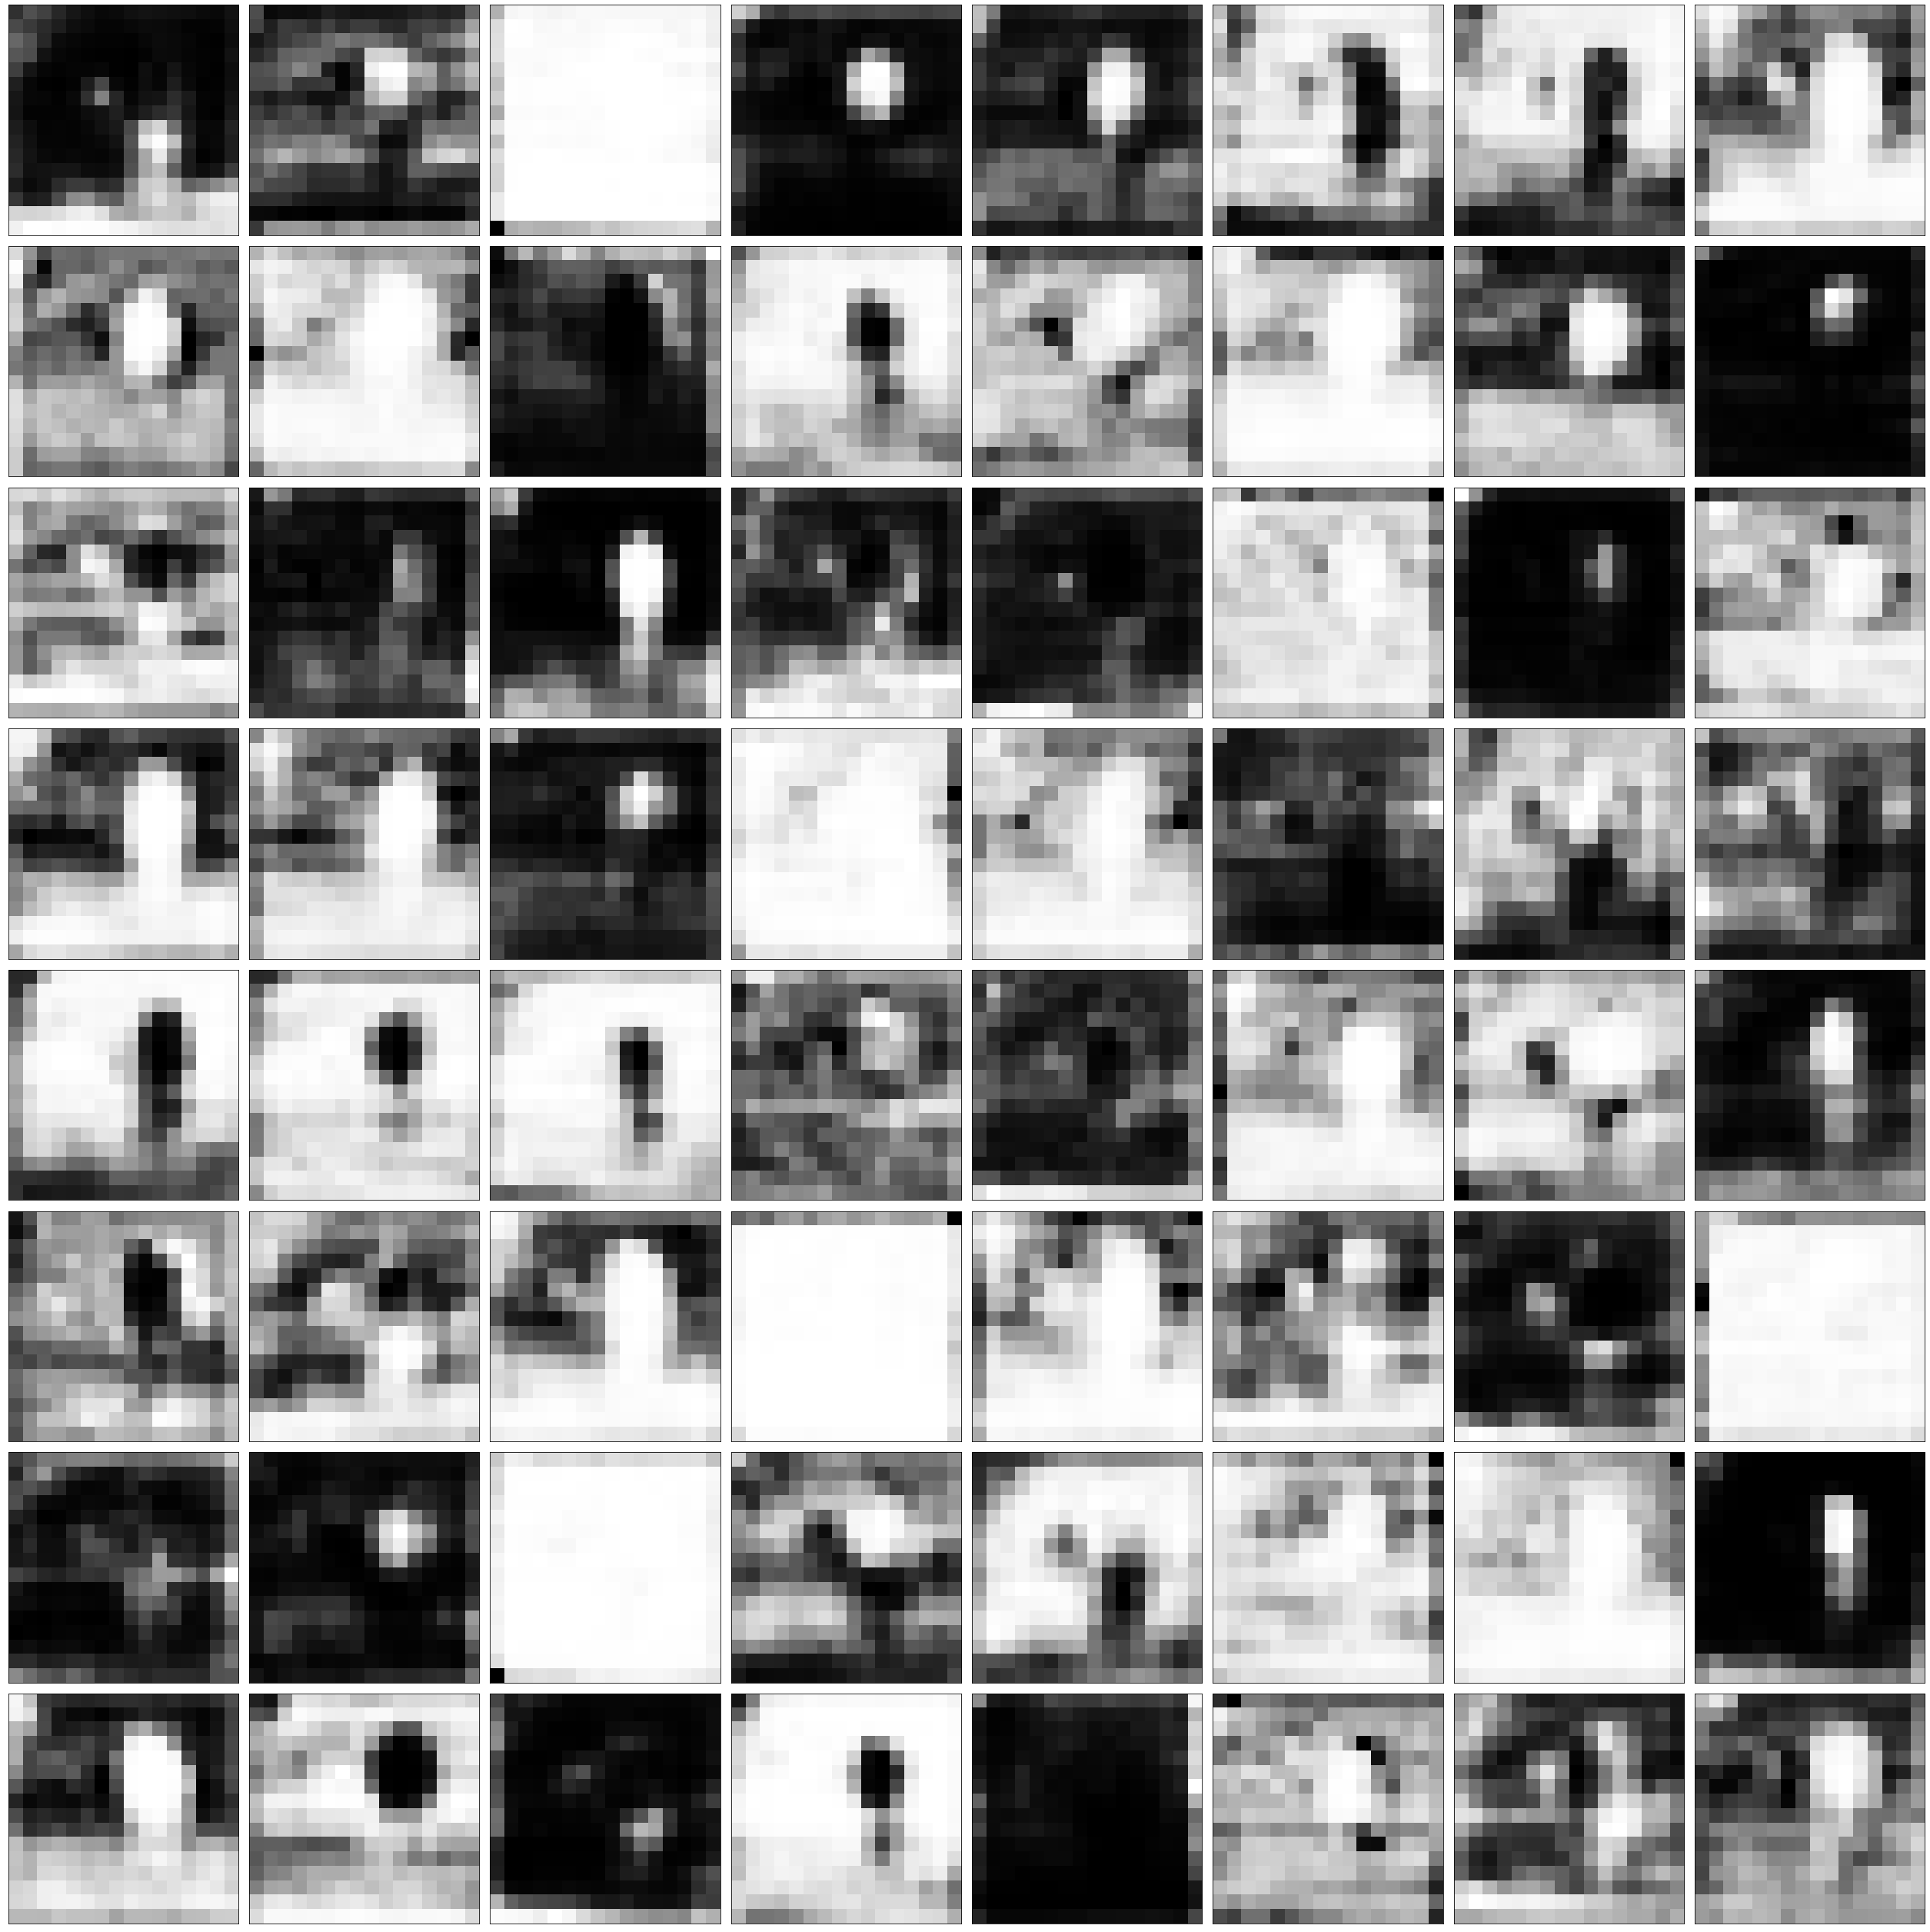

In [306]:
f, ax = plt.subplots(8, 8, figsize = (35, 35), tight_layout = True)
ix = 0
for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])
        b.imshow(sixthfeature_maps[0, :, : , ix], cmap = 'gray')
        ix = ix + 1
